# IMPORTAR LIBRERÍAS

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [25]:
# Split X train y test
from sklearn.model_selection import train_test_split

# Modelos para validación cruzada con cross_val_score y cross_validate
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Modelos para validar por regresión
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor

# Validación de modelos:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

# Calificación de modelos
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import make_scorer


# Para imputación categórica a numérica y predicción de columna numérica Destruction Level en Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, OneHotEncoder

from sklearn.impute import SimpleImputer
from sklearn.neighbors import KNeighborsRegressor

# Convertir columnas categóricas (Disaster Subtype, Origin, Associated Disaster) a numéricas para predecir Destruction Level Dis o Mag Value
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder
# Pipeline
from sklearn.pipeline import Pipeline
import joblib # guardar pipeline

In [26]:
df = pd.read_csv('../../99 PRUEBAS a los CSV/01 Prueba quitando eventos/04DesNat_DEFS_limpio_fc.csv')
df.head(5)

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
0,1900-9002-CPV,1900,9002,Climatological,Drought,Drought,Cabo Verde,CPV,Western Africa,Africa,...,NaN,1900,0,0,1900,0,0,11000,0,0
1,1900-9001-IND,1900,9001,Climatological,Drought,Drought,India,IND,Southern Asia,Asia,...,NaN,1900,0,0,1900,0,0,1250000,0,0
2,1902-0012-GTM,1902,12,Geophysical,Earthquake,Ground movement,Guatemala,GTM,Central America,Americas,...,-91,1902,4,18,1902,4,18,2000,0,843726
3,1904-0003-BGD,1904,3,Meteorological,Storm,Tropical cyclone,Bangladesh,BGD,Southern Asia,Asia,...,NaN,1904,11,0,1904,11,0,0,0,0
4,1905-0003-IND,1905,3,Geophysical,Earthquake,Ground movement,India,IND,Southern Asia,Asia,...,76.16,1905,4,4,1905,4,4,20000,0,812477


In [27]:
df.shape

(12826, 26)

In [28]:
df['Region'].unique()

array(['Western Africa', 'Southern Asia', 'Central America',
       'South America', 'Western Europe', 'Eastern Asia', 'Caribbean',
       'Northern Africa', 'Northern America', 'South-Eastern Asia',
       'Eastern Europe', 'Southern Europe', 'Melanesia', 'Polynesia',
       'Eastern Africa', 'Northern Europe', 'Western Asia',
       'Australia and New Zealand', 'Micronesia', 'Southern Africa',
       'Middle Africa', 'Russian Federation', 'Central Asia'],
      dtype=object)

Hay 23 regiones. Demasiadas para codificar???. Pensar en codificar por continente

## Eliminar los 0 metidos en la columna de salida 'Total Affected'


In [29]:
df_filtrado = df.loc[(df['Total Affected'] != 0)]
df_filtrado.shape

(9644, 26)

In [30]:
df_filtrado['Disaster Type'].value_counts()

Flood         4891
Storm         2907
Earthquake    1320
Drought        526
Name: Disaster Type, dtype: int64

In [31]:
df_filtrado.head()

,Dis No,Year,Seq,Disaster Subgroup,Disaster Type,Disaster Subtype,Country,ISO,Region,Continent,...,Longitude,Start Year,Start Month,Start Day,End Year,End Month,End Day,Total Deaths,Total Affected,Total Damages Adj
23,1912-0021-CAN,1912,21,Meteorological,Storm,Convective storm,Canada,CAN,Northern America,Americas,...,NaN,1912,6,30,1912,6,30,28,2700,151289
25,1914-0022-IDN,1914,22,Geophysical,Earthquake,Ground movement,Indonesia,IDN,South-Eastern Asia,Asia,...,101.82,1914,6,26,1914,6,26,20,20,0
26,1915-0011-CHN,1915,11,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1915,0,0,1915,0,0,0,3000000,0
30,1917-0013-CHN,1917,13,Hydrological,Flood,Riverine flood,China,CHN,Eastern Asia,Asia,...,NaN,1917,0,0,1917,0,0,0,635000,0
38,1920-9003-CHN,1920,9003,Climatological,Drought,Drought,China,CHN,Eastern Asia,Asia,...,NaN,1920,0,0,1920,0,0,500000,20000000,0


In [32]:
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9644 entries, 23 to 12825
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Dis No             9644 non-null   object
 1   Year               9644 non-null   int64 
 2   Seq                9644 non-null   int64 
 3   Disaster Subgroup  9644 non-null   object
 4   Disaster Type      9644 non-null   object
 5   Disaster Subtype   7456 non-null   object
 6   Country            9644 non-null   object
 7   ISO                9644 non-null   object
 8   Region             9644 non-null   object
 9   Continent          9644 non-null   object
 10  Location           9212 non-null   object
 11  Origin             3285 non-null   object
 12  Associated Dis     2827 non-null   object
 13  Dis Mag Value      9644 non-null   int64 
 14  Dis Mag Scale      9644 non-null   object
 15  Latitude           2315 non-null   object
 16  Longitude          2315 non-null   objec

<Axes: xlabel='Region', ylabel='Total Affected'>

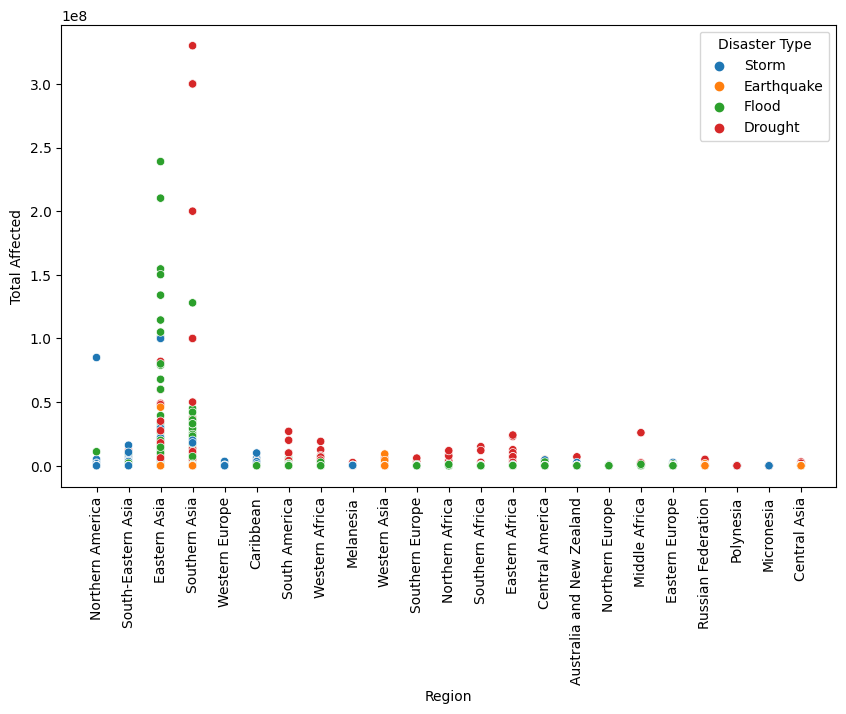

In [33]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.scatterplot(data=df_filtrado, x='Region', y='Total Affected', hue='Disaster Type')

<Axes: xlabel='Year', ylabel='Total Affected'>

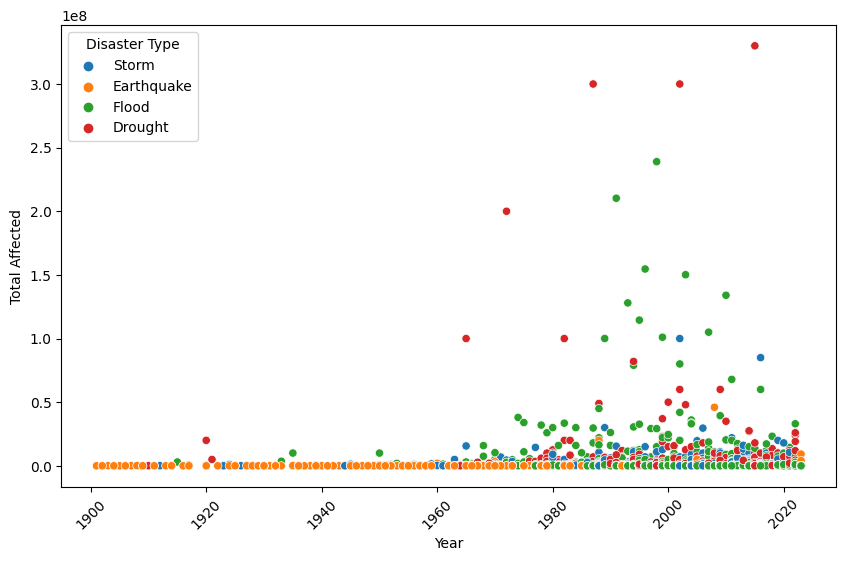

In [34]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.scatterplot(data=df_filtrado, x='Year', y='Total Affected', hue='Disaster Type')

<Axes: xlabel='Total Deaths', ylabel='Total Affected'>

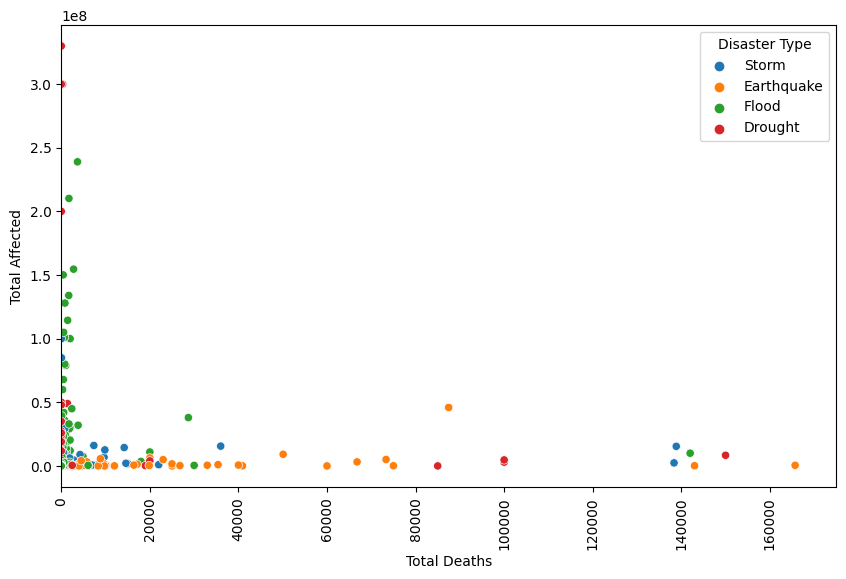

In [35]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
plt.xlim(0, 175000)
sns.scatterplot(data=df_filtrado, x='Total Deaths', y='Total Affected', hue='Disaster Type')

<Axes: xlabel='Total Affected', ylabel='Total Damages Adj'>

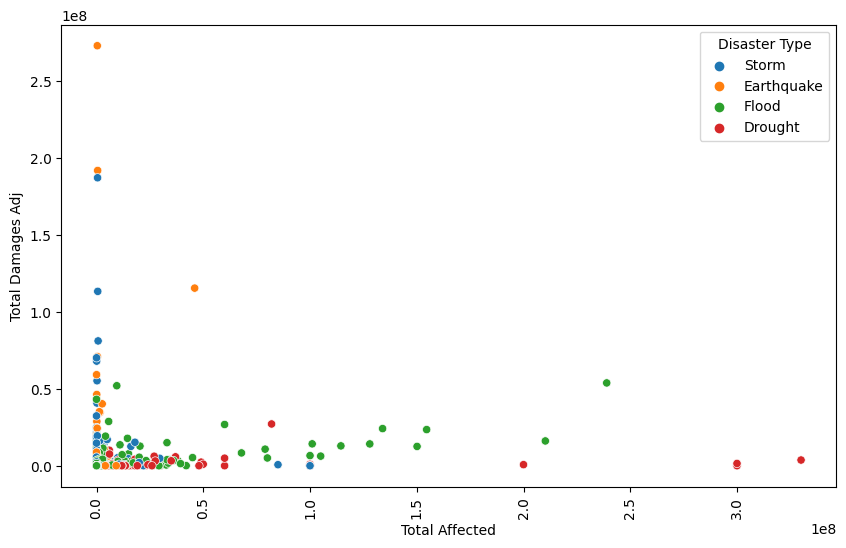

In [36]:
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.scatterplot(data=df_filtrado, x='Total Affected', y='Total Damages Adj', hue='Disaster Type')

## X e y

In [37]:
X = df_filtrado[['Region', 'Disaster Type', 'Year']]
y = df_filtrado['Total Affected']

## Pipeline columnas numéricas


In [38]:
pipeline_numeric = Pipeline([
    ('impute_median', SimpleImputer(strategy='median')),
    ('scaler', MinMaxScaler ())
])
numeric_col_names = X.select_dtypes(include=np.number).columns.to_list()
numeric_col_names

['Year']

## Pipeline columnas categóricas

In [39]:
pipeline_categorical = Pipeline([
    ('impute_moda', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder (drop='first', sparse=False))
])
categorical_col_names = X.select_dtypes(include='object').columns.to_list()
categorical_col_names

['Region', 'Disaster Type']

## Pipeline columnas numéricas + categóricas

In [40]:
preprocessor = ColumnTransformer([
    ('numerical', pipeline_numeric, numeric_col_names),
    ('categorical', pipeline_categorical, categorical_col_names)
])
preprocessor

ColumnTransformer(transformers=[('numerical',
                                 Pipeline(steps=[('impute_median',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', MinMaxScaler())]),
                                 ['Year']),
                                ('categorical',
                                 Pipeline(steps=[('impute_moda',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False))]),
                                 ['Region', 'Disaster Type'])])

## Pipeline columnas numéricas + categóricas + modelado

In [41]:
pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('knn', KNeighborsRegressor(n_neighbors=3))
])
pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('impute_median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   MinMaxScaler())]),
                                                  ['Year']),
                                                 ('categorical',
                                                  Pipeline(steps=[('impute_moda',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse=False))]),
                                                  ['Region',
                                                   'Disaster Type'])])),
                ('knn', KNeighborsRegressor(n_neighbors=3))])

## Ejecución del pipeline


In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict (X_test)
mean_absolute_error(y_test, y_pred)

C:\Users\blanc\AppData\Roaming\Python\Python310\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


1788318.456367721

## Guardar el pipeline


In [43]:
import joblib

joblib.dump(pipeline, 'pipeline.joblib')

['pipeline.joblib']

## Cargar pipeline


In [44]:
pipeline = joblib.load('pipeline.joblib')
pipeline.predict(X_test)[:10]

array([1.94316667e+04, 2.48466667e+03, 2.18466667e+04, 6.71666667e+02,
       1.09170000e+04, 6.01000000e+02, 3.74223333e+04, 2.41705633e+06,
       2.37430000e+04, 1.20940000e+05])